## Insurance Cost Prediction

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Import Dataset [1,000,000 records x 12 features]

In [3]:
data = pd.read_csv('insurance_dataset.csv')
data.head()

age  gender    bmi  children smoker     region medical_history  \
0   46    male  21.45         5    yes  southeast        Diabetes   
1   25  female  25.38         2    yes  northwest        Diabetes   
2   38    male  44.88         2    yes  southwest             NaN   
3   25    male  19.89         0     no  northwest             NaN   
4   49    male  38.21         3    yes  northwest        Diabetes   

  family_medical_history exercise_frequency    occupation coverage_level  \
0                    NaN              Never   Blue collar        Premium   
1    High blood pressure       Occasionally  White collar        Premium   
2    High blood pressure       Occasionally   Blue collar        Premium   
3               Diabetes             Rarely  White collar       Standard   
4    High blood pressure             Rarely  White collar       Standard   

        charges  
0  20460.307669  
1  20390.899218  
2  20204.476302  
3  11789.029843  
4  19268.309838

- age: age of primary beneficiary
- sex: gender of beneficiary [female, male] 
- bmi: Body mass index, A measure of body fat based on height and weight, (kg / m ^ 2) - ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking status [yes, no]
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- Medical History: Information about the individual's old medical problems.
- Family Medical History: Information about the family's medical record.
- Exercise Frequency: The frequency of the individual's exercise routine.
- Occupation: The occupation of the insured individual.
- Coverage Level: The type of insurance plan.
- charges: Individual medical costs billed by health insurance

In [4]:
data.shape

(1000000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [6]:
data.describe(include='number').round(2)

age         bmi    children     charges
count  1000000.00  1000000.00  1000000.00  1000000.00
mean        41.50       34.00        2.50    16735.12
std         13.86        9.23        1.71     4415.81
min         18.00       18.00        0.00     3445.01
25%         29.00       26.02        1.00    13600.37
50%         41.00       34.00        2.00    16622.13
75%         53.00       41.99        4.00    19781.47
max         65.00       50.00        5.00    32561.56

In [7]:
data.describe(include='object')

gender   smoker     region medical_history family_medical_history  \
count   1000000  1000000    1000000          749238                 749596   
unique        2        2          4               3                      3   
top        male      yes  northeast   Heart disease          Heart disease   
freq     500107   500129     250343          250121                 250035   

       exercise_frequency  occupation coverage_level  
count             1000000     1000000        1000000  
unique                  4           4              3  
top                Rarely  Unemployed          Basic  
freq               250538      250571         333515

### Data Preprocessing

In [8]:
data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

#### Data Cleaning

- Handling missing values

In [9]:
data.isnull().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [10]:
data['medical_history'].value_counts()

medical_history
Heart disease          250121
High blood pressure    249782
Diabetes               249335
Name: count, dtype: int64

In [11]:
data['family_medical_history'].value_counts()

family_medical_history
Heart disease          250035
High blood pressure    249824
Diabetes               249737
Name: count, dtype: int64

In [12]:
data['medical_history'].fillna('No Record', inplace=True)
data['family_medical_history'].fillna('No Record', inplace=True)

In [13]:
sum(data.isnull().sum())

0

In [14]:
data['family_medical_history'].value_counts()

family_medical_history
No Record              250404
Heart disease          250035
High blood pressure    249824
Diabetes               249737
Name: count, dtype: int64

- Handling Duplicates

In [15]:
data.duplicated().sum()

0

In [16]:
[col for col in data.columns if data[col].dtype == 'object']

['gender',
 'smoker',
 'region',
 'medical_history',
 'family_medical_history',
 'exercise_frequency',
 'occupation',
 'coverage_level']

In [17]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(data[col].value_counts(), '\n\n')

gender
male      500107
female    499893
Name: count, dtype: int64 


smoker
yes    500129
no     499871
Name: count, dtype: int64 


region
northeast    250343
southwest    250095
northwest    249931
southeast    249631
Name: count, dtype: int64 


medical_history
No Record              250762
Heart disease          250121
High blood pressure    249782
Diabetes               249335
Name: count, dtype: int64 


family_medical_history
No Record              250404
Heart disease          250035
High blood pressure    249824
Diabetes               249737
Name: count, dtype: int64 


exercise_frequency
Rarely          250538
Occasionally    250362
Frequently      249746
Never           249354
Name: count, dtype: int64 


occupation
Unemployed      250571
Student         250279
Blue collar     249825
White collar    249325
Name: count, dtype: int64 


coverage_level
Basic       333515
Standard    333508
Premium     332977
Name: count, dtype: int64 




- Check: Strip whitespaces in categorical columns

In [18]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

In [19]:
[col for col in data.columns if data[col].dtype != 'object']

['age', 'bmi', 'children', 'charges']

In [20]:
for col in data.columns:
    if data[col].dtype != 'object':
        print(col, ': ', data[col].unique(), '\n\n')

age :  [46 25 38 49 55 64 53 40 22 21 45 56 24 36 32 30 65 35 60 26 43 33 44 19
 41 42 61 23 31 20 62 59 57 29 34 27 47 50 37 52 63 28 54 51 58 48 39 18] 


bmi :  [21.45 25.38 44.88 ... 34.62 46.87 34.2 ] 


children :  [5 2 0 3 4 1] 


charges :  [20460.30766887 20390.89921764 20204.47630193 ... 22076.63285624
 20297.61872767 23429.72502965] 




In [21]:
[print(col, ': ', data[col].unique(), '\n\n') for col in data.columns if data[col].dtype != 'object']

age :  [46 25 38 49 55 64 53 40 22 21 45 56 24 36 32 30 65 35 60 26 43 33 44 19
 41 42 61 23 31 20 62 59 57 29 34 27 47 50 37 52 63 28 54 51 58 48 39 18] 




bmi :  [21.45 25.38 44.88 ... 34.62 46.87 34.2 ] 


children :  [5 2 0 3 4 1] 


charges :  [20460.30766887 20390.89921764 20204.47630193 ... 22076.63285624
 20297.61872767 23429.72502965] 




[None, None, None, None]

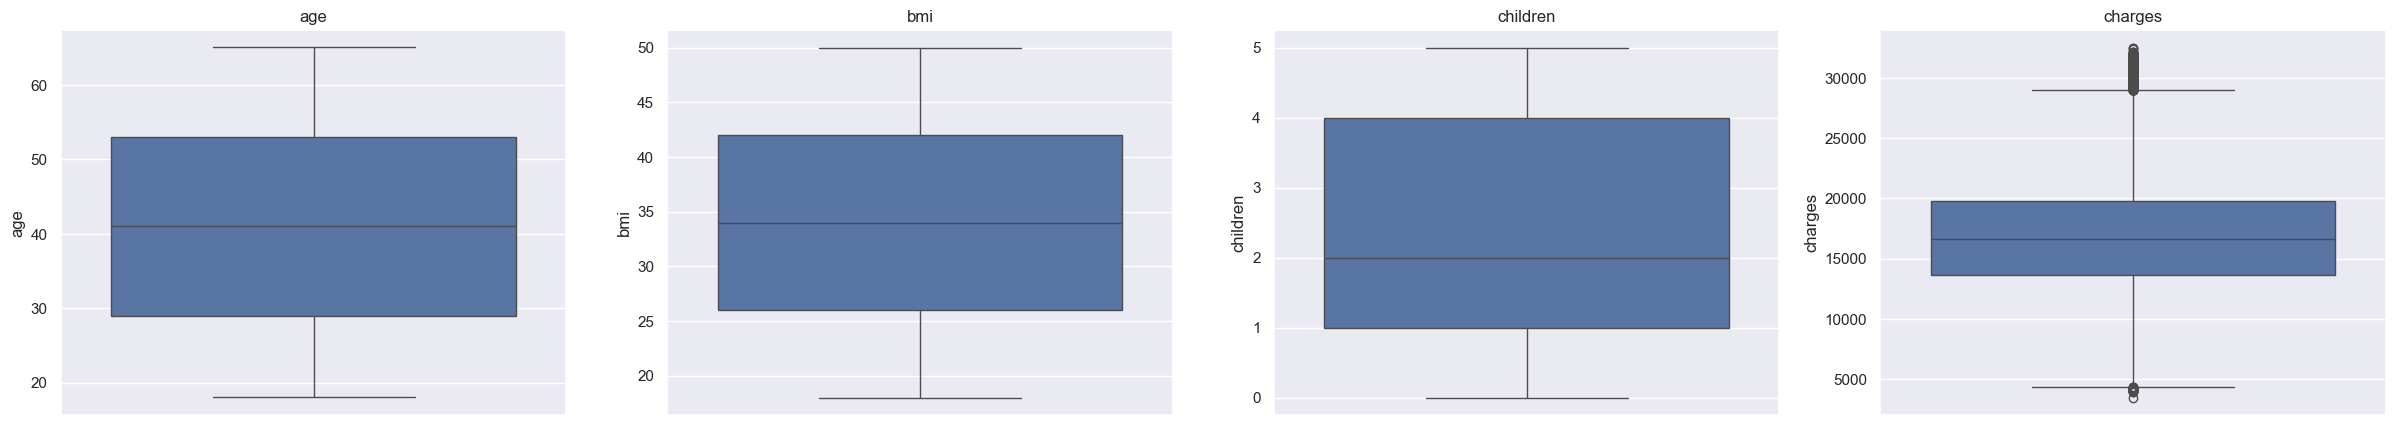

In [22]:
ax, fig = plt.subplots(1, 4, figsize=(30, 5))

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    sns.boxplot(data[col], ax=fig[i])
    fig[i].set_title(col)

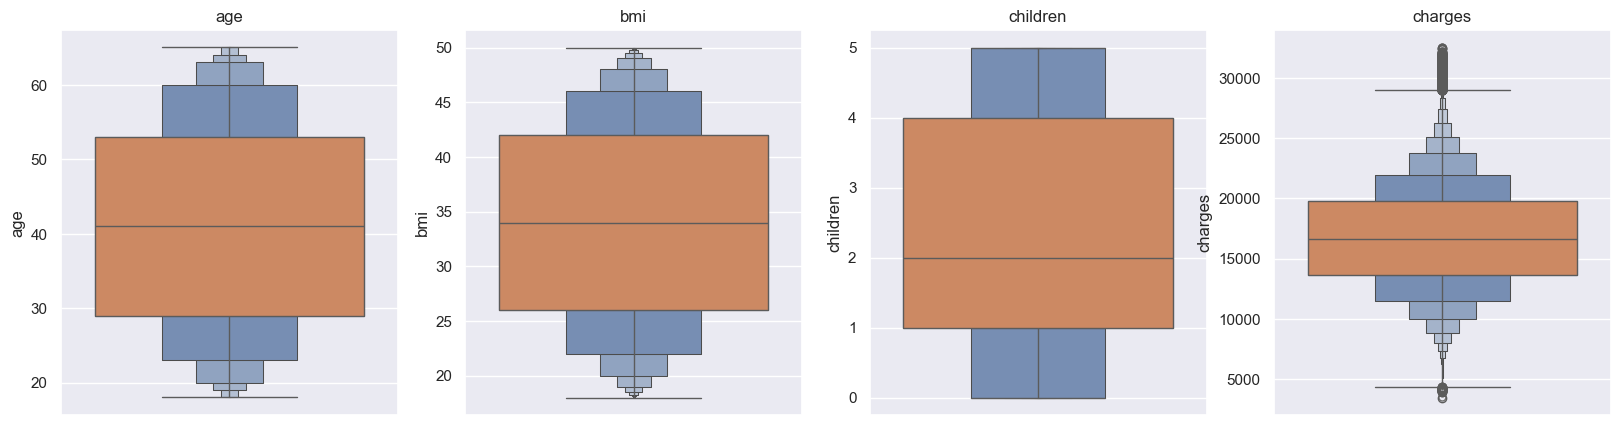

In [23]:
ax, fig = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    sns.boxenplot(data[col], ax=fig[i])
    sns.boxplot(data[col], ax=fig[i])
    fig[i].set_title(col)

In [24]:
data['charges'].describe()

count    1000000.000000
mean       16735.117481
std         4415.808211
min         3445.011643
25%        13600.372379
50%        16622.127973
75%        19781.465410
max        32561.560374
Name: charges, dtype: float64

- Show records of charges with outliers

In [25]:
q1 = data['charges'].quantile(0.25)
q3 = data['charges'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(data[(data['charges'] <= lower_bound)].shape)
data[(data['charges'] <= lower_bound)] 


(27, 12)


age  gender    bmi  children smoker     region      medical_history  \
60144    29  female  20.99         2     no  southwest            No Record   
68563    24  female  20.11         0     no  northeast            No Record   
80424    26  female  22.11         0     no  southwest            No Record   
88779    29  female  25.08         2     no  southwest            No Record   
118128   22  female  20.79         1     no  southwest            No Record   
133138   20  female  23.87         0     no  northwest            No Record   
157784   39  female  20.52         0     no  southeast            No Record   
167139   33  female  19.91         0     no  southeast            No Record   
275414   26  female  20.81         2     no  southwest            No Record   
301090   20  female  20.61         1     no  southwest            No Record   
411715   19  female  25.51         0     no  northwest            No Record   
412347   38  female  18.56         0     no  southwest            No Record   
441955   35  female  21.12         0     no  southwest            No Record   
456579   27  female  19.17         0     no  southwest  High blood pressure   
511773   21  female  19.25         0     no  northwest            No Record   
552814   26  female  24.12         1     no  southeast            No Record   
588166   29  female  29.63         0     no  southwest            No Record   
590959   20  female  18.26         0     no  southeast            No Record   
622200   52  female  19.37         0     no  southwest            No Record   
671222   32  female  23.23         1     no  southwest            No Record   
726438   34  female  33.13         0     no  northwest            No Record   
845662   25  female  19.25         1     no  northwest            No Record   
892530   19  female  24.09         0     no  northwest            No Record   
899288   41  female  28.66         0     no  northwest            No Record   
937228   60  female  26.72         0     no  southwest            No Record   
961102   37  female  22.40         0     no  southwest            No Record   
995019   20  female  23.93         0     no  southwest            No Record   

       family_medical_history exercise_frequency  occupation coverage_level  \
60144               No Record             Rarely  Unemployed          Basic   
68563               No Record              Never  Unemployed          Basic   
80424               No Record              Never  Unemployed          Basic   
88779               No Record              Never  Unemployed          Basic   
118128              No Record              Never  Unemployed          Basic   
133138              No Record              Never  Unemployed          Basic   
157784              No Record              Never  Unemployed          Basic   
167139              No Record             Rarely  Unemployed          Basic   
275414              No Record              Never  Unemployed          Basic   
301090              No Record             Rarely  Unemployed          Basic   
411715              No Record             Rarely  Unemployed          Basic   
412347              No Record              Never  Unemployed          Basic   
441955              No Record              Never  Unemployed          Basic   
456579              No Record              Never  Unemployed          Basic   
511773              No Record              Never  Unemployed          Basic   
552814              No Record              Never  Unemployed          Basic   
588166              No Record              Never  Unemployed          Basic   
590959              No Record              Never  Unemployed          Basic   
622200              No Record              Never  Unemployed          Basic   
671222              No Record              Never  Unemployed          Basic   
726438              No Record              Never  Unemployed          Basic   
845662              No Record              Never  Unemplo

In [26]:
q1 = data['charges'].quantile(0.25)
q3 = data['charges'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data[(data['charges'] >= upper_bound)]

age  gender    bmi  children smoker     region medical_history  \
59       49  female  44.67         5    yes  northwest   Heart disease   
117      46    male  42.33         2    yes  southwest   Heart disease   
704      53  female  48.23         3    yes  southeast   Heart disease   
804      53  female  35.30         0    yes  southwest   Heart disease   
1451     63    male  41.76         2    yes  northwest   Heart disease   
...     ...     ...    ...       ...    ...        ...             ...   
998316   50    male  39.52         3    yes  northeast   Heart disease   
998667   65    male  49.77         4    yes  southeast   Heart disease   
999077   37  female  22.70         0    yes  northeast   Heart disease   
999319   25  female  42.41         4    yes  northeast   Heart disease   
999790   64    male  44.41         3    yes  southeast   Heart disease   

       family_medical_history exercise_frequency    occupation coverage_level  \
59              Heart disease         Frequently  White collar        Premium   
117             Heart disease         Frequently       Student        Premium   
704             Heart disease       Occasionally  White collar        Premium   
804             Heart disease         Frequently  White collar        Premium   
1451            Heart disease             Rarely  White collar        Premium   
...                       ...                ...           ...            ...   
998316          Heart disease         Frequently       Student        Premium   
998667          Heart disease             Rarely  White collar        Premium   
999077          Heart disease         Frequently  White collar        Premium   
999319          Heart disease         Frequently  White collar        Premium   
999790          Heart disease       Occasionally   Blue collar        Premium   

             charges  
59      30370.731957  
117     29412.861604  
704     29913.058400  
804     29183.845771  
1451    29693.427087  
...              ...  
998316  30017.590027  
998667  30628.879005  
999077  29204.562471  
999319  30566.944707  
999790  30074.556653  

[2190 rows x 12 columns]

Insight: 
Records with outliers are about 2000 records out of 1M records in the datase (small ratio but can be related to a significant observations) so it can be handled with standardization in the feature Engineering section 

### Exploratory Data Analysis

#### Numerical features 

In [27]:
[col for col in data.columns if data[col].dtype != 'object']

['age', 'bmi', 'children', 'charges']

- Numerical features [Univariate]

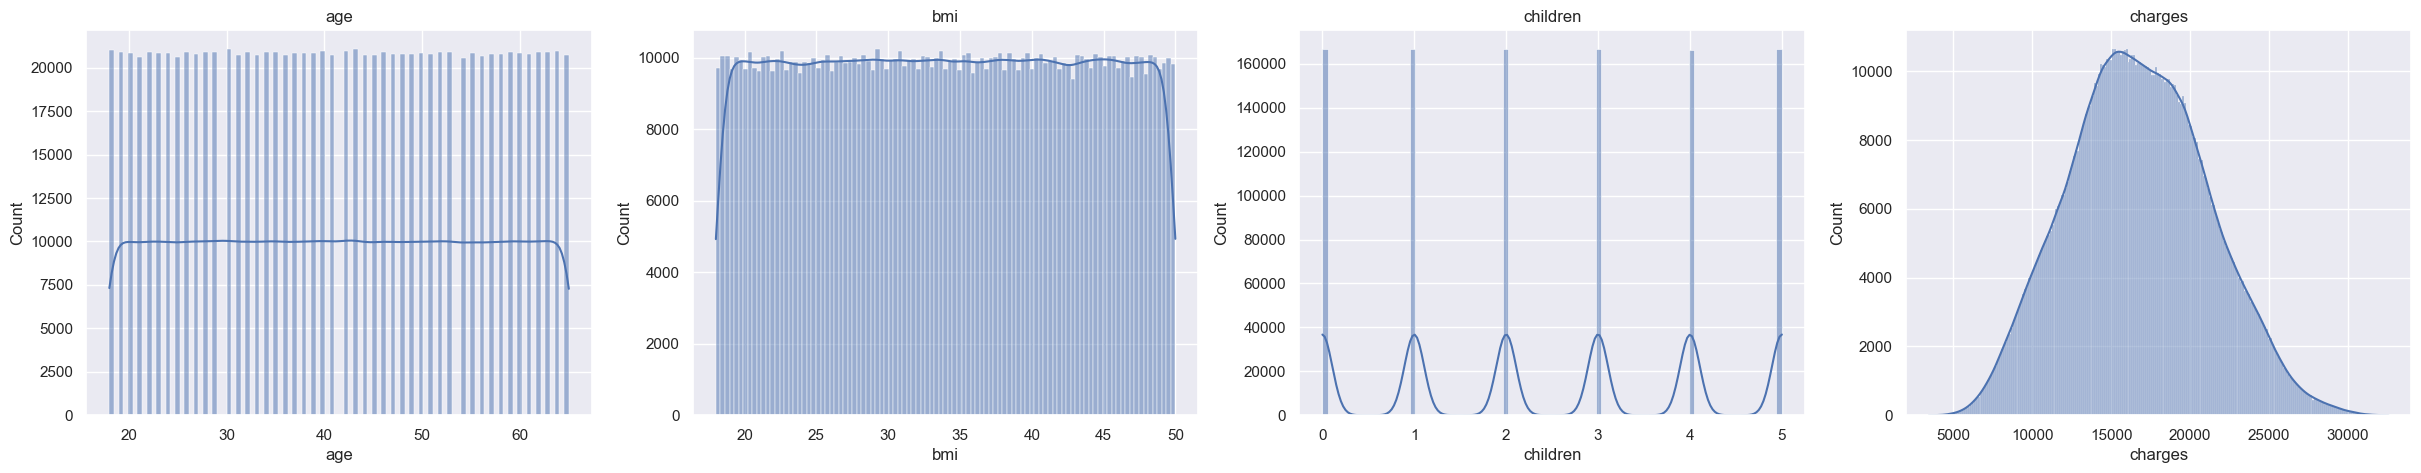

In [28]:
ax, fig = plt.subplots(1, 4, figsize=(30, 5))

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    sns.histplot(data[col], kde=True ,ax=fig[i])
    fig[i].set_title(col)

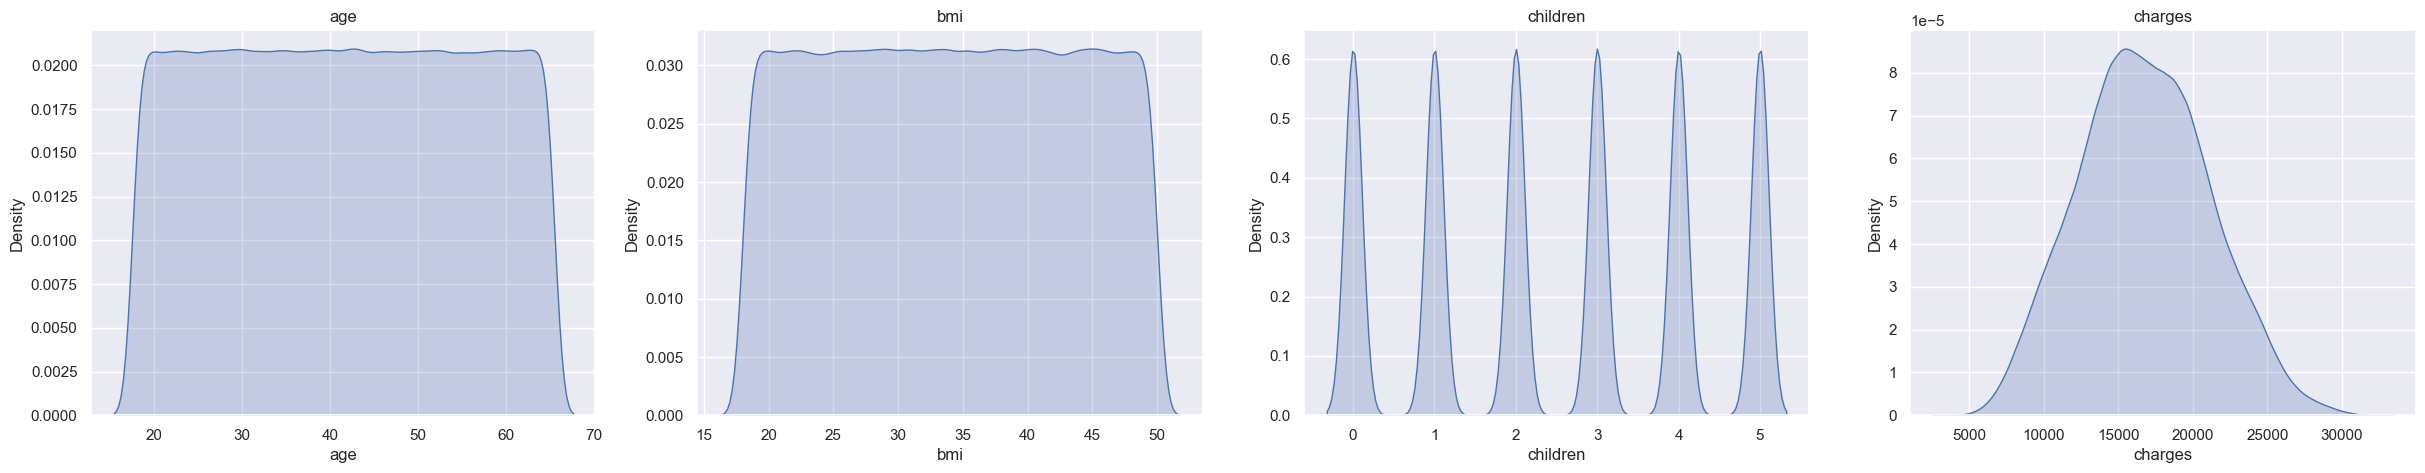

In [29]:
ax, fig = plt.subplots(1, 4, figsize=(30, 5))

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    sns.kdeplot(data[col], fill=True, ax=fig[i]) 
    fig[i].set_title(col)

- Numerical features [Bivariate]

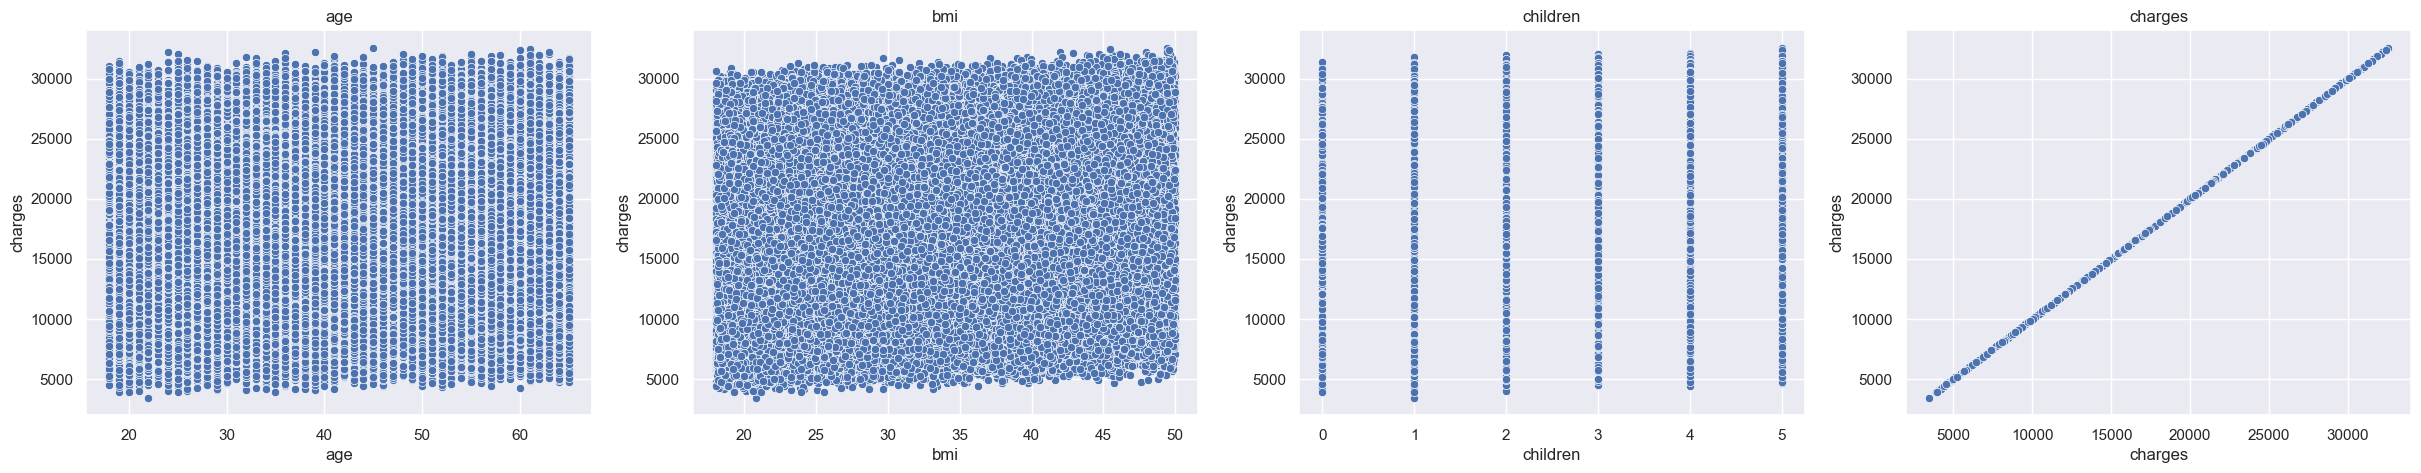

In [30]:
# Plot scatterplot for age,bmi,children vs charges (using subplot)
ax, fig = plt.subplots(1, 4, figsize=(30, 5))

for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    sns.scatterplot(x=data[col], y=data['charges'], ax=fig[i])
    fig[i].set_title(col)

- => Insight:
Almost There is no direct relation between age,bmi,children and charges

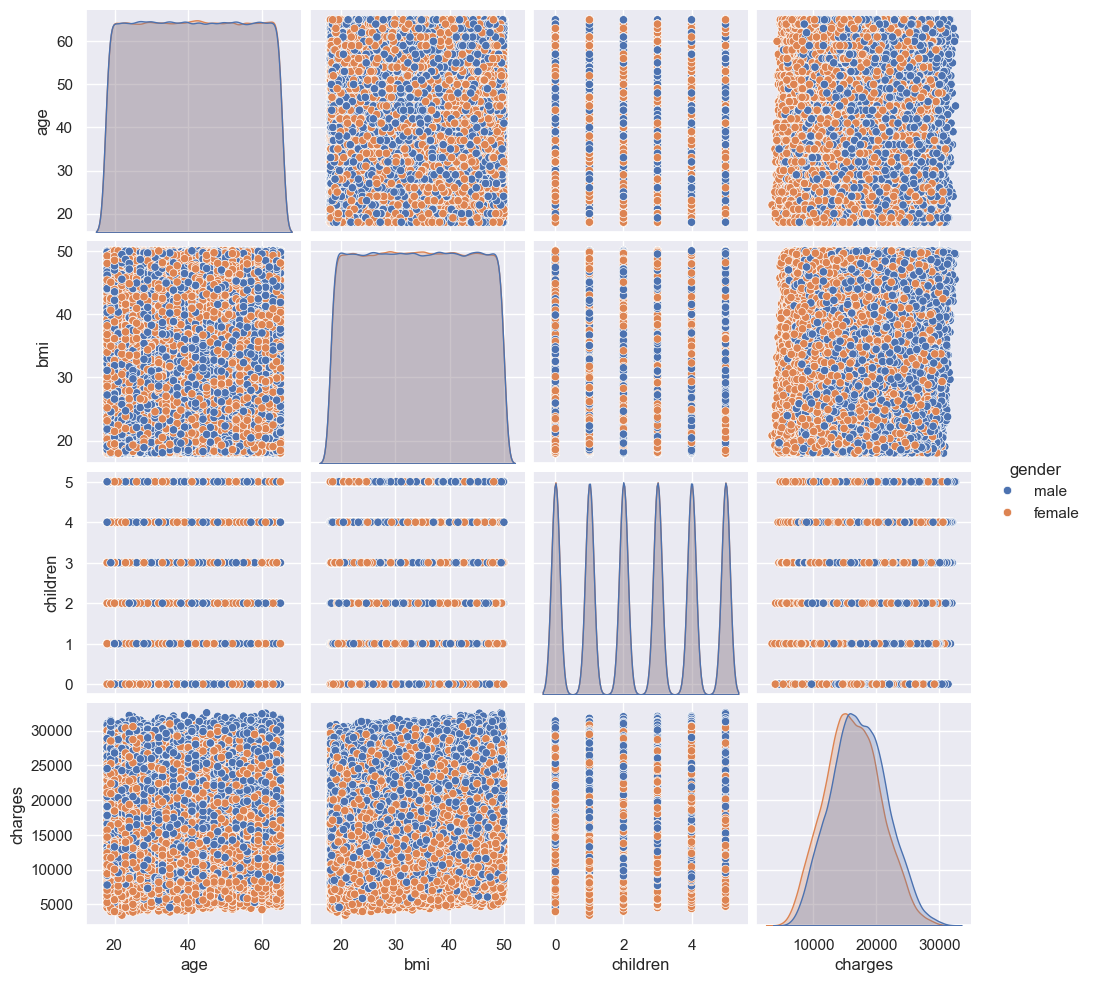

In [31]:
sns.pairplot(data, vars=['age', 'bmi', 'children', 'charges'] , hue='gender')

#### Categorical features 

In [32]:
[col for col in data.columns if data[col].dtype == 'object']

['gender',
 'smoker',
 'region',
 'medical_history',
 'family_medical_history',
 'exercise_frequency',
 'occupation',
 'coverage_level']

- Categorical features [Univariate]

<Axes: xlabel='coverage_level', ylabel='count'>

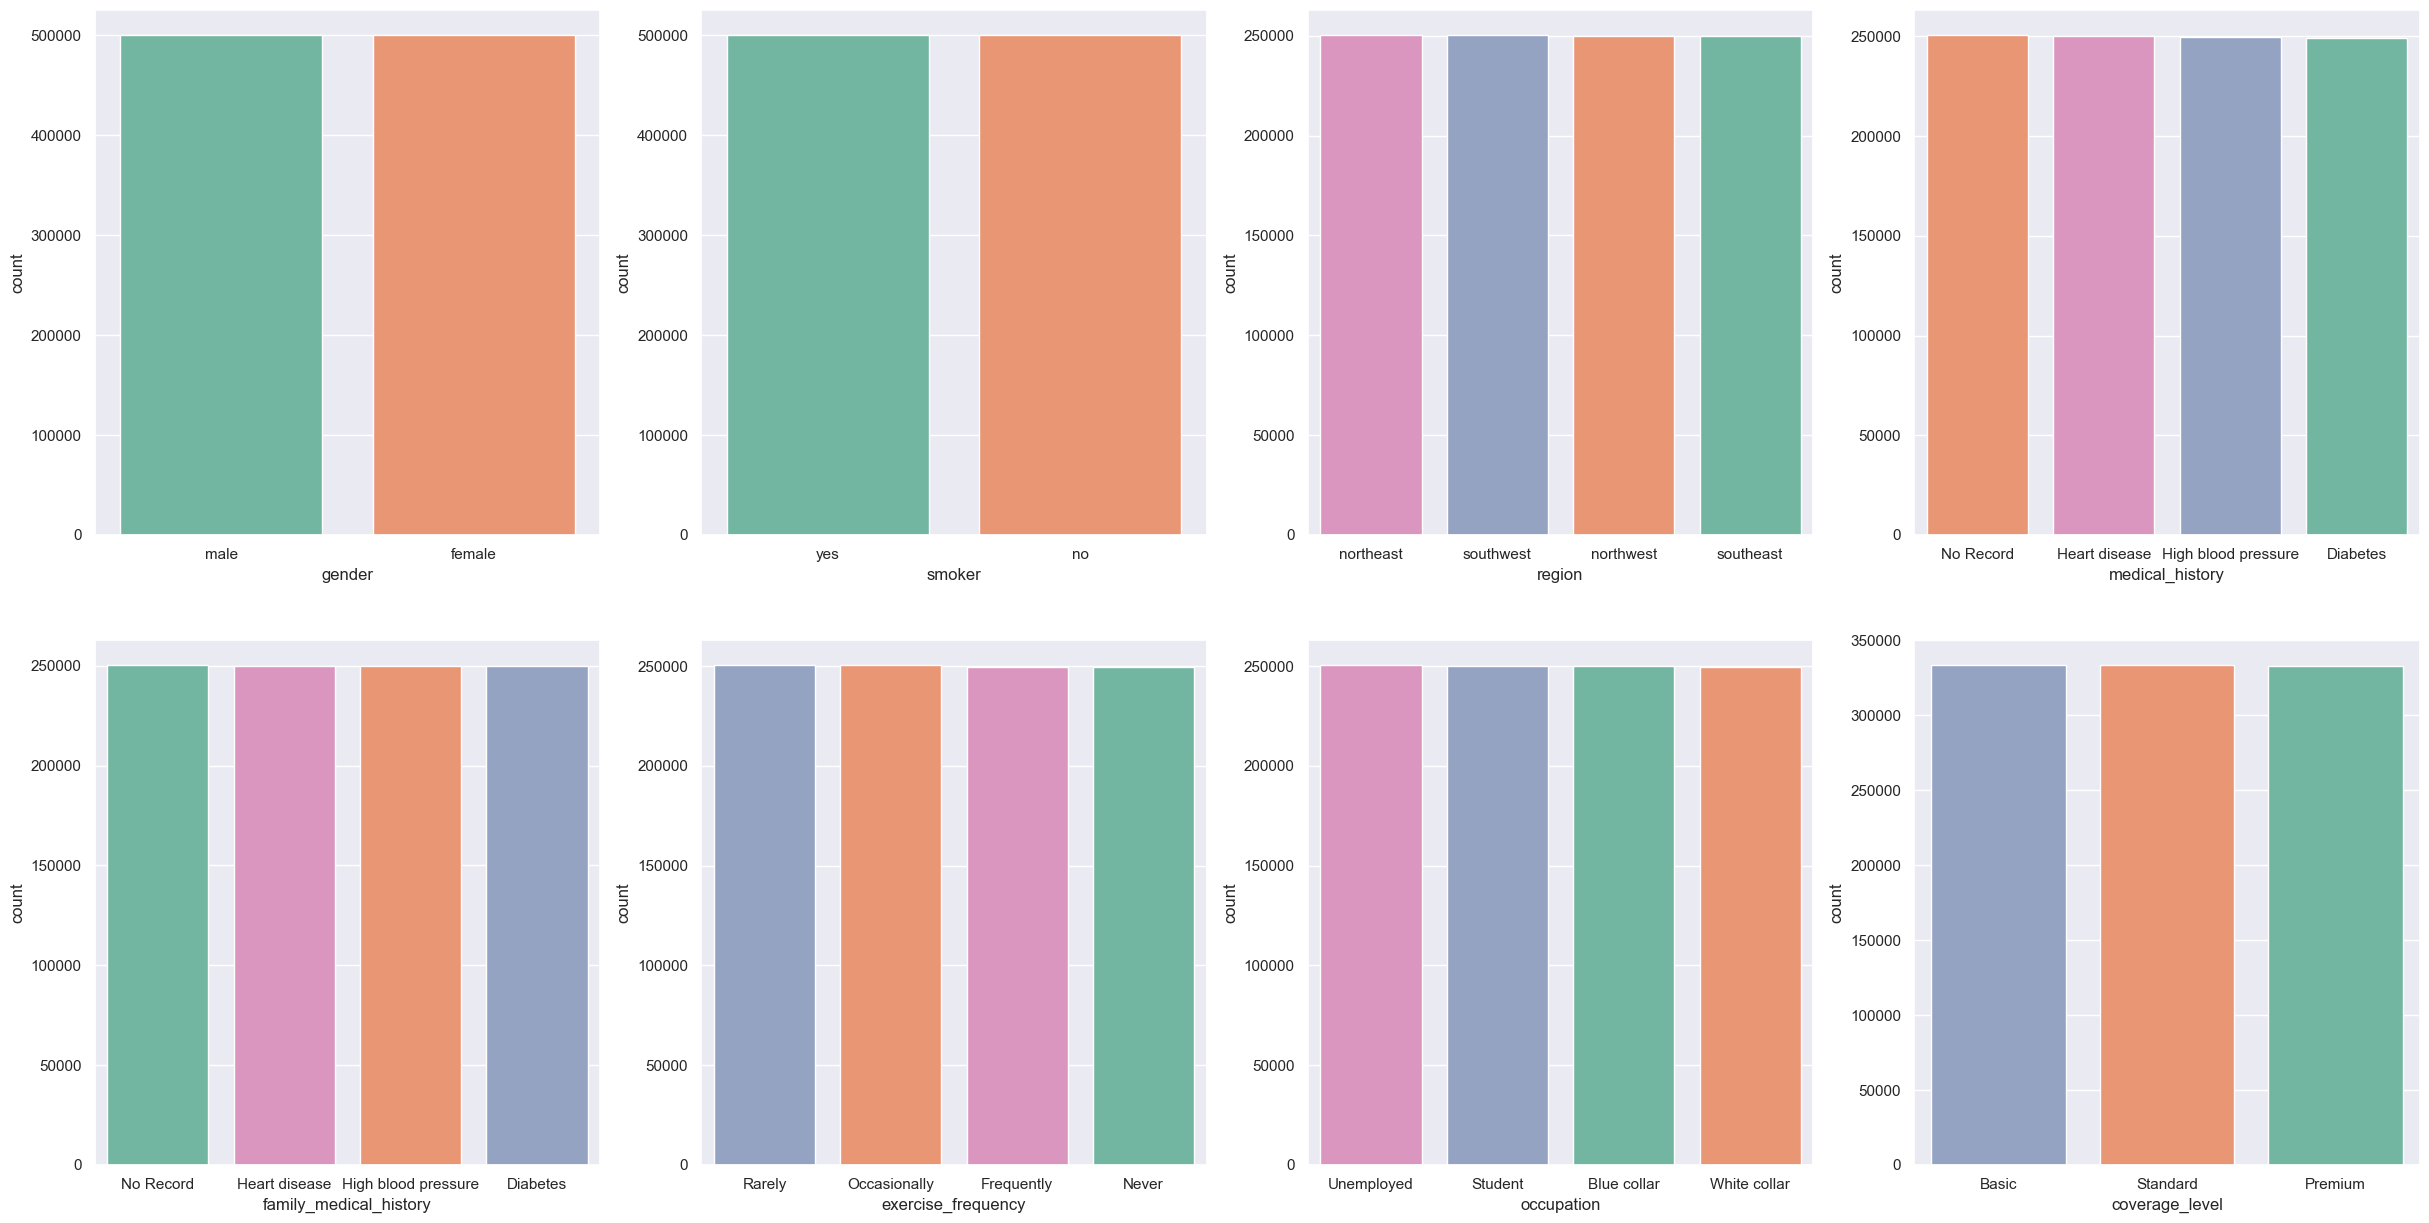

In [33]:
ax, fig = plt.subplots(2, 4, figsize=(30, 15))
sns.countplot(x='gender', data=data,ax=fig[0, 0], palette='Set2', order=data['gender'].value_counts().index, hue='gender')
sns.countplot(x='smoker', data=data, ax=fig[0, 1], palette='Set2', order=data['smoker'].value_counts().index, hue='smoker')
sns.countplot(x='region', data=data, ax=fig[0, 2], palette='Set2', order=data['region'].value_counts().index, hue='region')
sns.countplot(x='medical_history', data=data, ax=fig[0, 3], palette='Set2', order=data['medical_history'].value_counts().index, hue='medical_history')
sns.countplot(x='family_medical_history', data=data, ax=fig[1, 0], palette='Set2', order=data['family_medical_history'].value_counts().index, hue='family_medical_history')
sns.countplot(x='exercise_frequency', data=data, ax=fig[1, 1], palette='Set2', order=data['exercise_frequency'].value_counts().index, hue='exercise_frequency')
sns.countplot(x='occupation', data=data, ax=fig[1, 2], palette='Set2', order=data['occupation'].value_counts().index, hue='occupation')
sns.countplot(x='coverage_level', data=data, ax=fig[1, 3], palette='Set2', order=data['coverage_level'].value_counts().index, hue='coverage_level')

- Numeical and Categorical Features

<Axes: xlabel='region', ylabel='charges'>

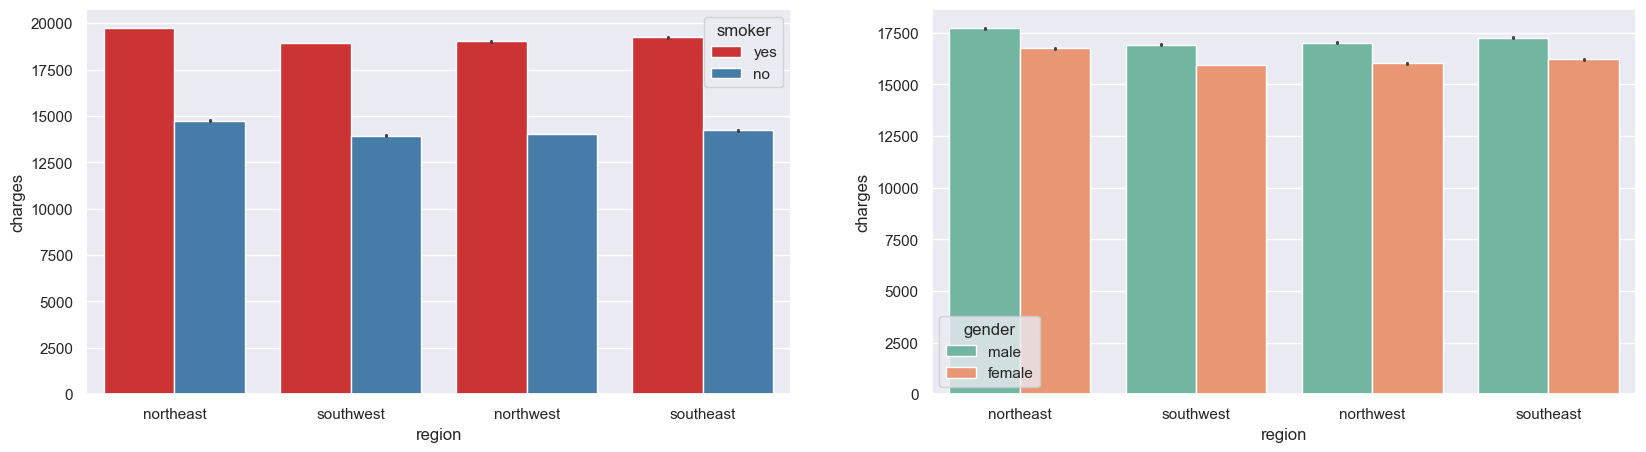

In [34]:
ax, fig = plt.subplots(1,2,figsize=(20, 5))
sns.barplot(x='region', y='charges', data=data, hue='smoker', palette='Set1', order=data['region'].value_counts().index, ax = fig[0])
sns.barplot(x='region', y='charges', data=data, hue='gender', palette='Set2', order=data['region'].value_counts().index, ax = fig[1])

<Axes: xlabel='children', ylabel='charges'>

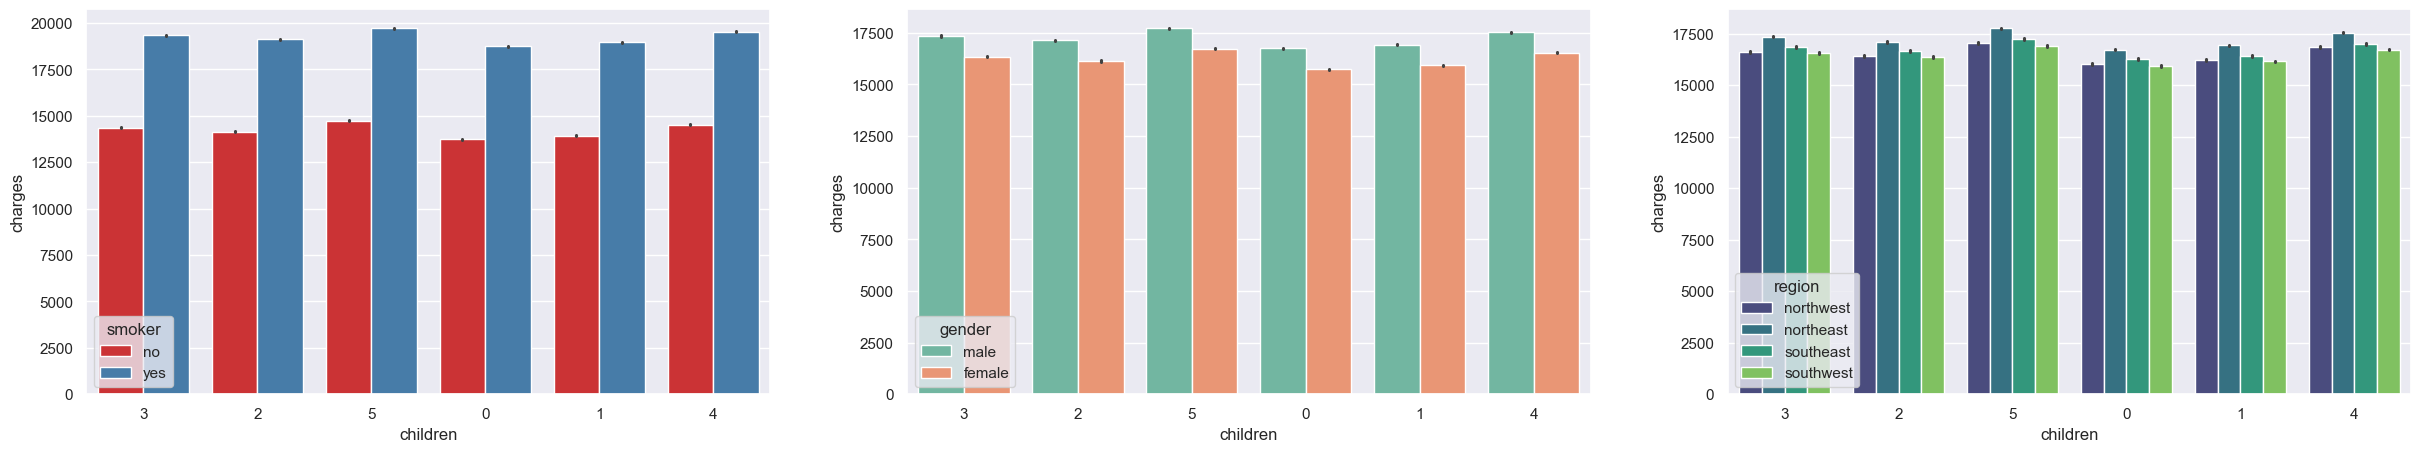

In [35]:
ax, fig = plt.subplots(1,3, figsize=(30,5))
sns.barplot(x='children', y='charges', data=data, hue='smoker', palette='Set1', order=data['children'].value_counts().index, ax = fig[0])
sns.barplot(x='children', y='charges', data=data, hue='gender', palette='Set2', order=data['children'].value_counts().index, ax= fig[1])
sns.barplot(x='children', y='charges', data=data, hue='region', palette= 'viridis', order=data['children'].value_counts().index, ax= fig[2])


<Axes: xlabel='medical_history', ylabel='charges'>

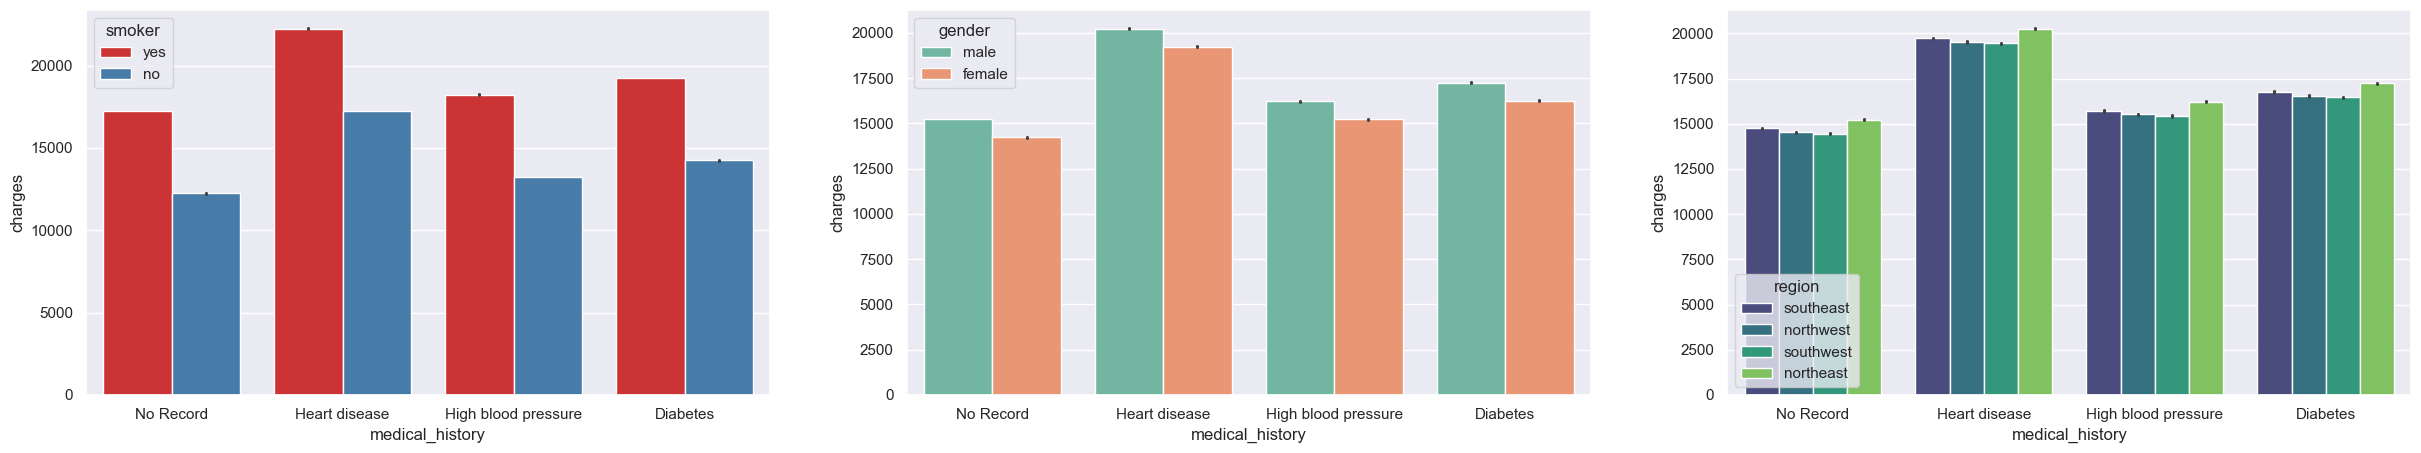

In [36]:
ax, fig = plt.subplots(1,3,figsize=(30, 5))
sns.barplot(x='medical_history', y='charges', data=data, hue='smoker', palette='Set1', order=data['medical_history'].value_counts().index, ax = fig[0])
sns.barplot(x='medical_history', y='charges', data=data, hue='gender', palette='Set2', order=data['medical_history'].value_counts().index, ax= fig[1])
sns.barplot(x='medical_history', y='charges', data=data, hue='region', palette= 'viridis', order=data['medical_history'].value_counts().index, ax= fig[2])

<Axes: xlabel='family_medical_history', ylabel='charges'>

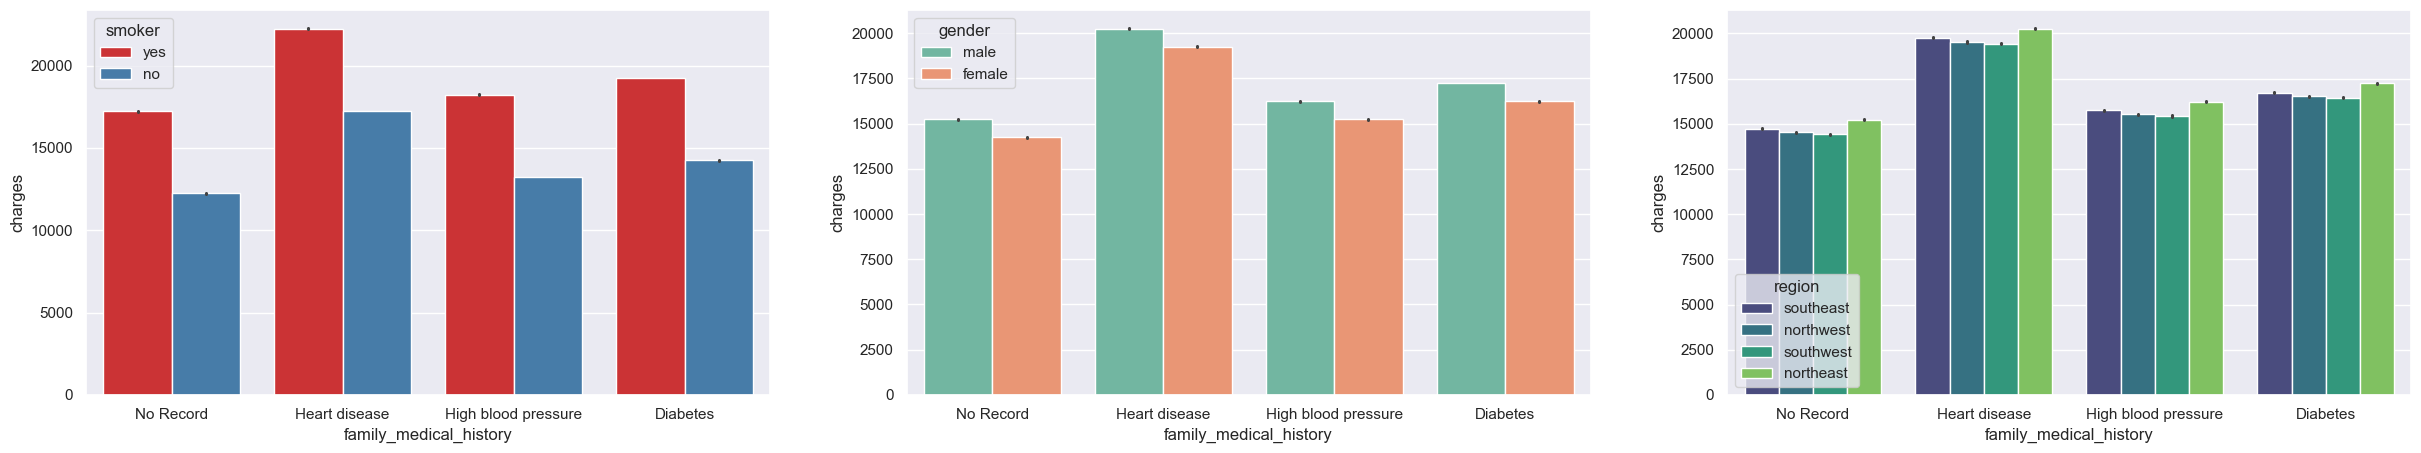

In [37]:
ax, fig = plt.subplots(1,3,figsize=(30, 5))
sns.barplot(x='family_medical_history', y='charges', data=data, hue='smoker', palette='Set1', order=data['family_medical_history'].value_counts().index, ax = fig[0])
sns.barplot(x='family_medical_history', y='charges', data=data, hue='gender', palette='Set2', order=data['family_medical_history'].value_counts().index, ax= fig[1])
sns.barplot(x='family_medical_history', y='charges', data=data, hue='region', palette= 'viridis', order=data['family_medical_history'].value_counts().index, ax= fig[2])

<Axes: xlabel='occupation', ylabel='charges'>

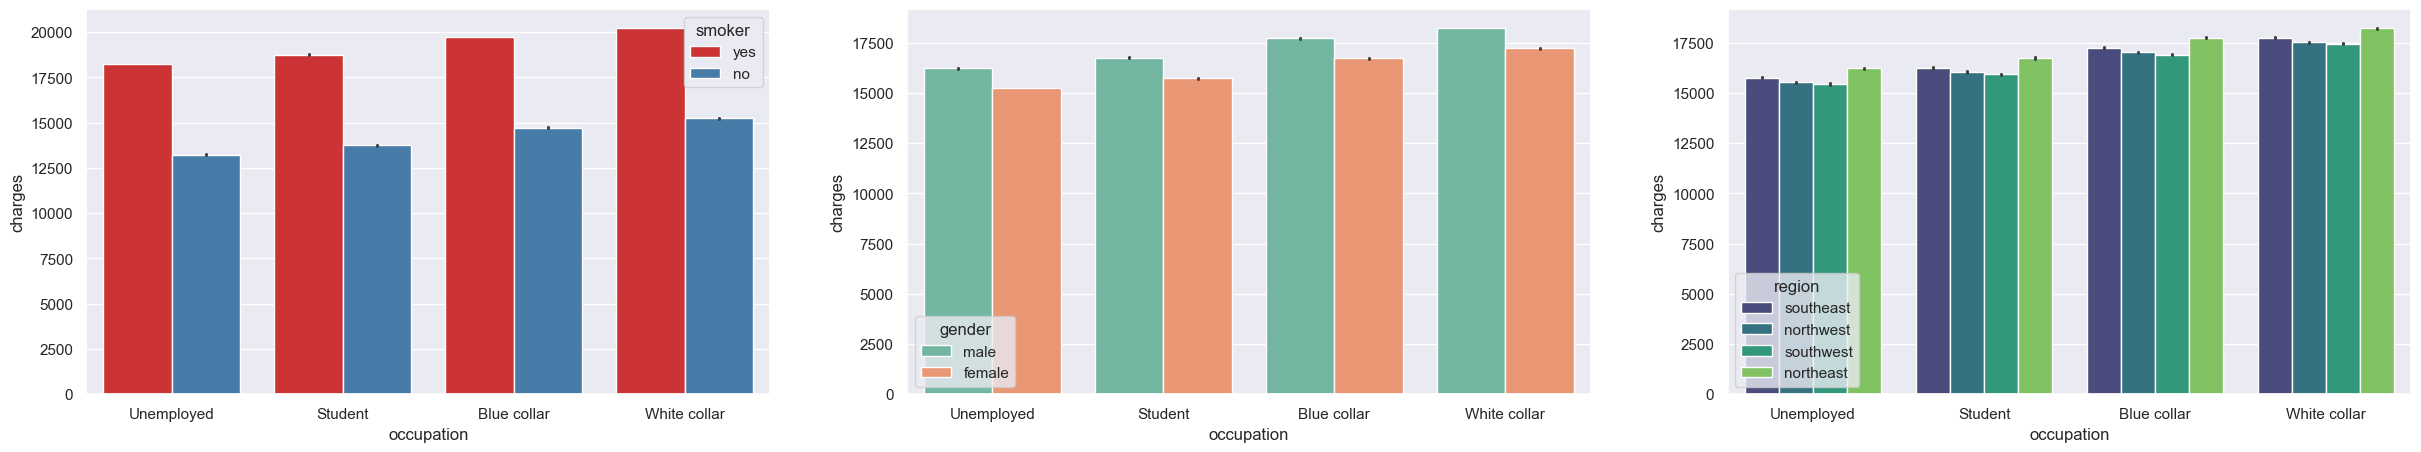

In [38]:
ax, fig = plt.subplots(1,3,figsize=(30, 5))
sns.barplot(x='occupation', y='charges', data=data, hue='smoker', palette='Set1', order=data['occupation'].value_counts().index, ax = fig[0])
sns.barplot(x='occupation', y='charges', data=data, hue='gender', palette='Set2', order=data['occupation'].value_counts().index, ax= fig[1])
sns.barplot(x='occupation', y='charges', data=data, hue='region', palette= 'viridis', order=data['occupation'].value_counts().index, ax= fig[2])

<Axes: xlabel='exercise_frequency', ylabel='charges'>

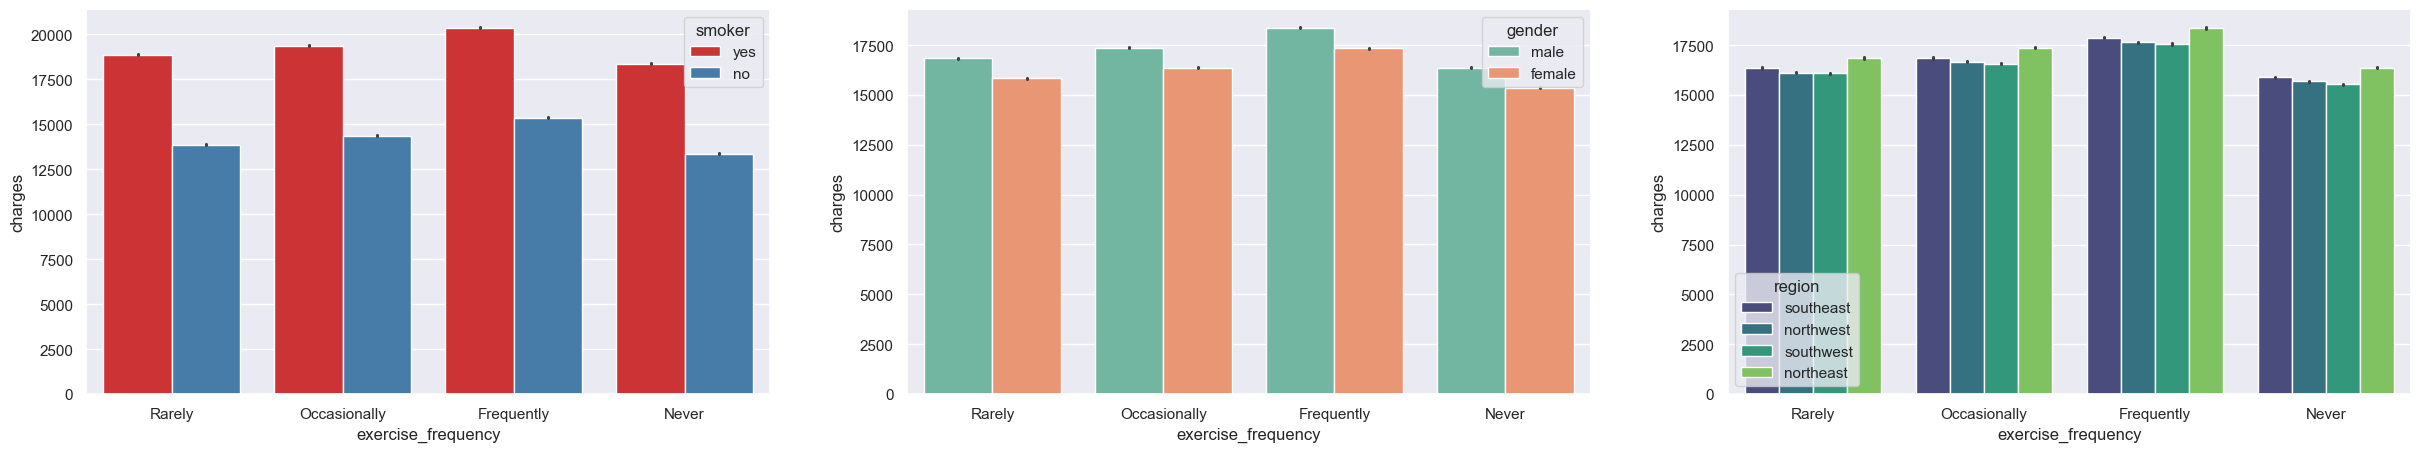

In [39]:
ax, fig = plt.subplots(1,3,figsize=(30, 5))
sns.barplot(x='exercise_frequency', y='charges', data=data, hue='smoker', palette='Set1', order=data['exercise_frequency'].value_counts().index, ax = fig[0])
sns.barplot(x='exercise_frequency', y='charges', data=data, hue='gender', palette='Set2', order=data['exercise_frequency'].value_counts().index, ax= fig[1])
sns.barplot(x='exercise_frequency', y='charges', data=data, hue='region', palette= 'viridis', order=data['exercise_frequency'].value_counts().index, ax= fig[2])

<Axes: xlabel='coverage_level', ylabel='charges'>

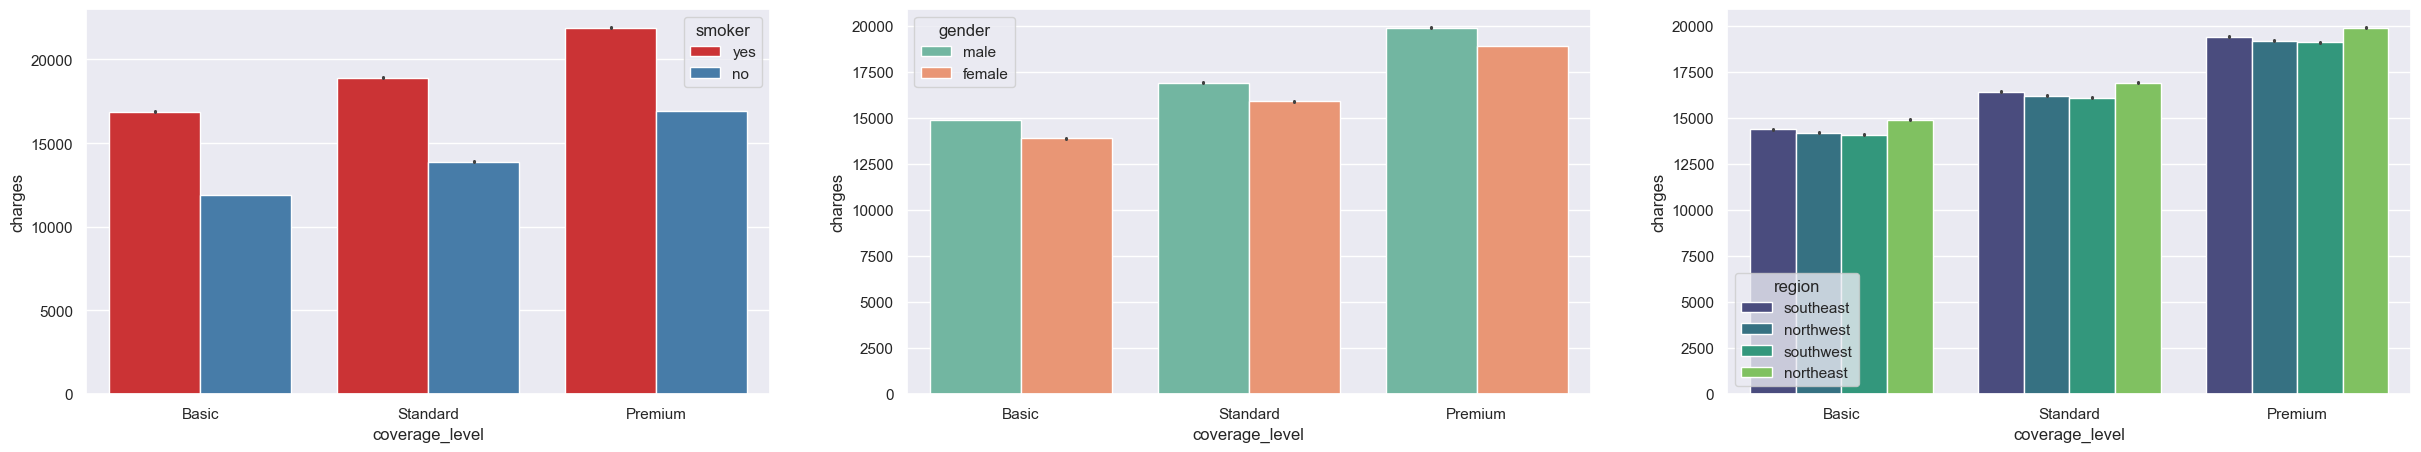

In [40]:
ax, fig = plt.subplots(1,3,figsize=(30, 5))
sns.barplot(x='coverage_level', y='charges', data=data, hue='smoker', palette='Set1', order=data['coverage_level'].value_counts().index, ax = fig[0])
sns.barplot(x='coverage_level', y='charges', data=data, hue='gender', palette='Set2', order=data['coverage_level'].value_counts().index, ax= fig[1])
sns.barplot(x='coverage_level', y='charges', data=data, hue='region', palette= 'viridis', order=data['coverage_level'].value_counts().index, ax= fig[2])

<Axes: xlabel='region', ylabel='charges'>

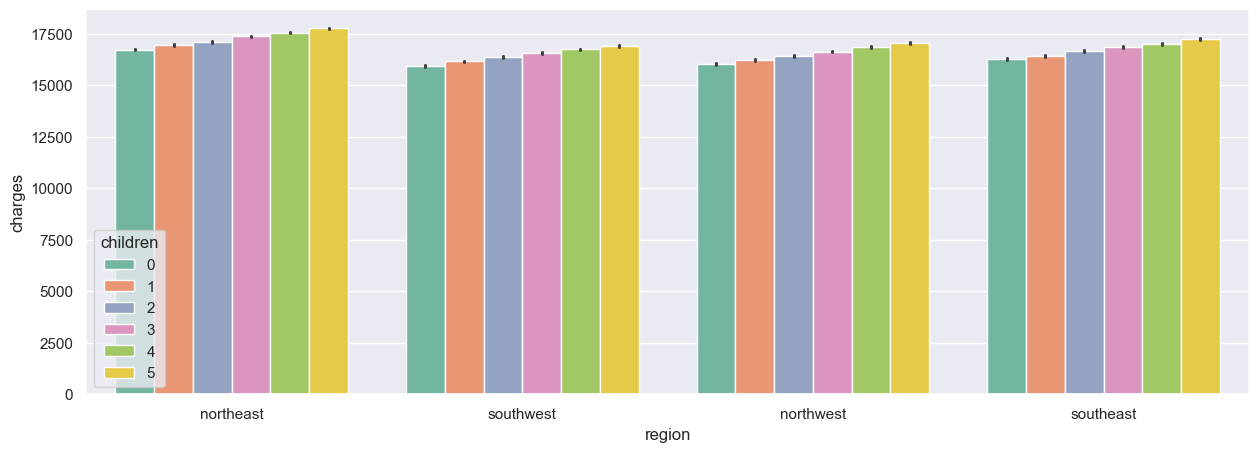

In [41]:
plt.figure(figsize=(15, 5))
sns.barplot(x='region', y='charges', data=data, hue='children', palette= 'Set2', order=data['region'].value_counts().index)

=> Insight:
- There is a small difference in charges associated with no. of dependents / children in different regions

<Axes: xlabel='charges', ylabel='Count'>

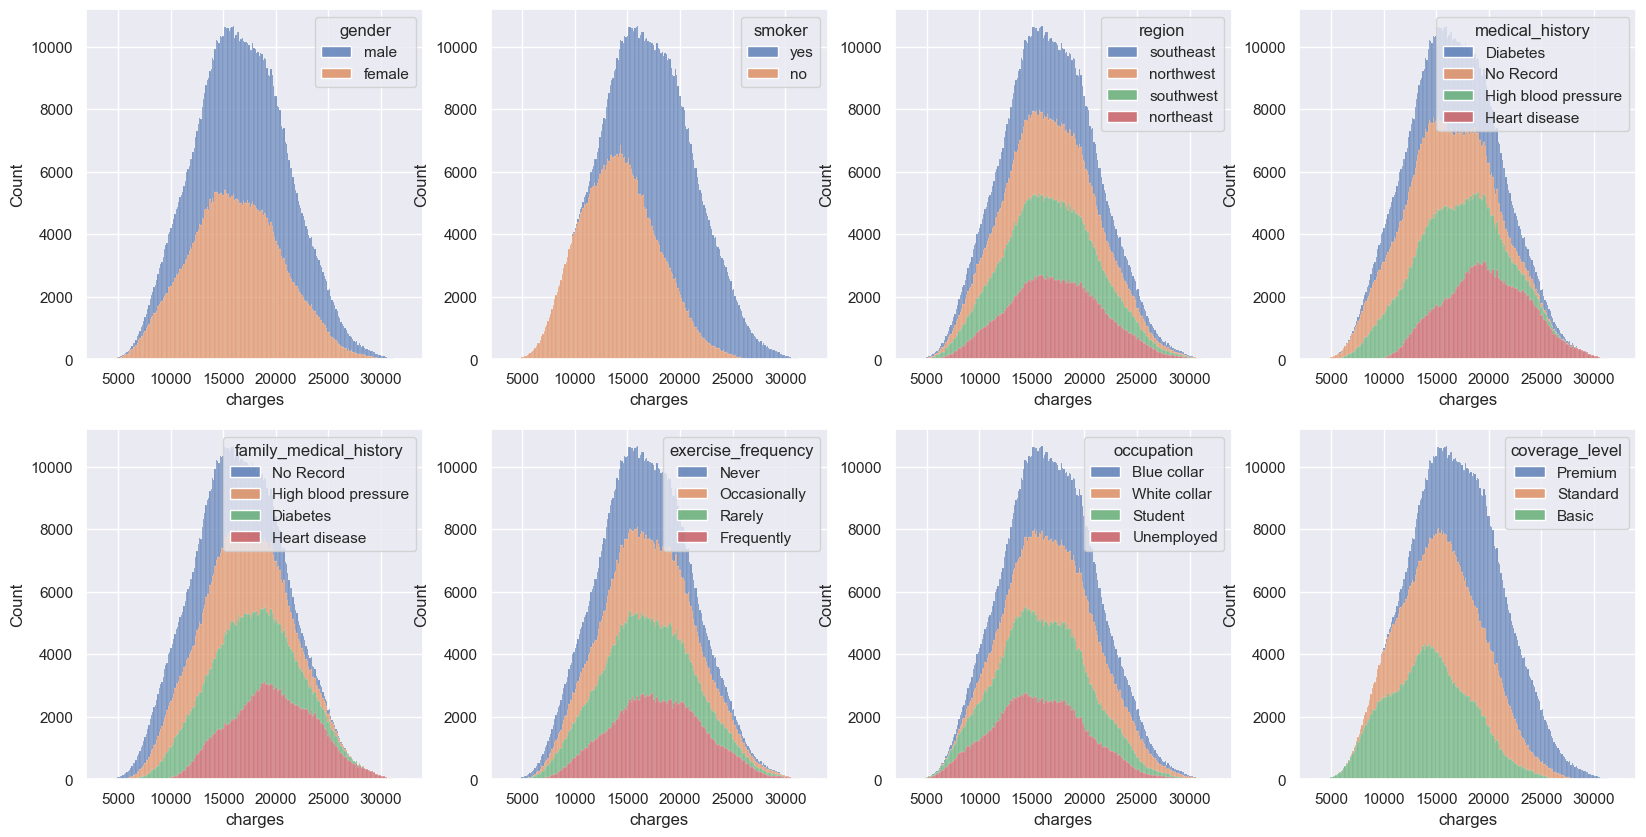

In [42]:
ax, fig = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(data=data, x='charges', hue='gender', multiple='stack', ax=fig[0,0])
sns.histplot(data=data, x='charges', hue='smoker', multiple='stack', ax=fig[0,1])
sns.histplot(data=data, x='charges', hue='region', multiple='stack', ax=fig[0,2])
sns.histplot(data=data, x='charges', hue='medical_history', multiple='stack', ax=fig[0,3])
sns.histplot(data=data, x='charges', hue='family_medical_history', multiple='stack', ax=fig[1,0])
sns.histplot(data=data, x='charges', hue='exercise_frequency', multiple='stack', ax=fig[1,1])
sns.histplot(data=data, x='charges', hue='occupation', multiple='stack', ax=fig[1,2])
sns.histplot(data=data, x='charges', hue='coverage_level', multiple='stack', ax=fig[1,3])

<Figure size 4000x1000 with 0 Axes>

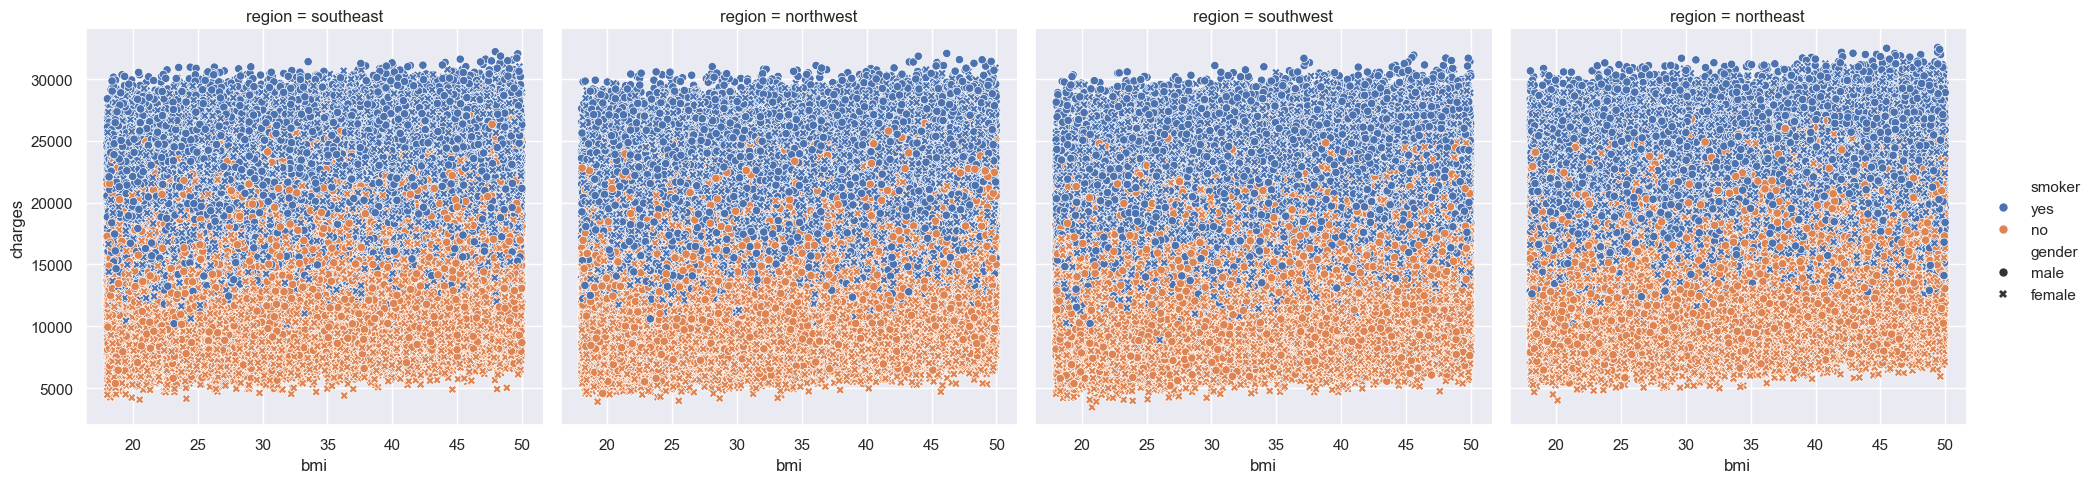

In [43]:
plt.figure(figsize=(40, 10))
sns.relplot(data=data, x='bmi', y='charges', hue='smoker', style='gender', col='region', col_wrap=4)

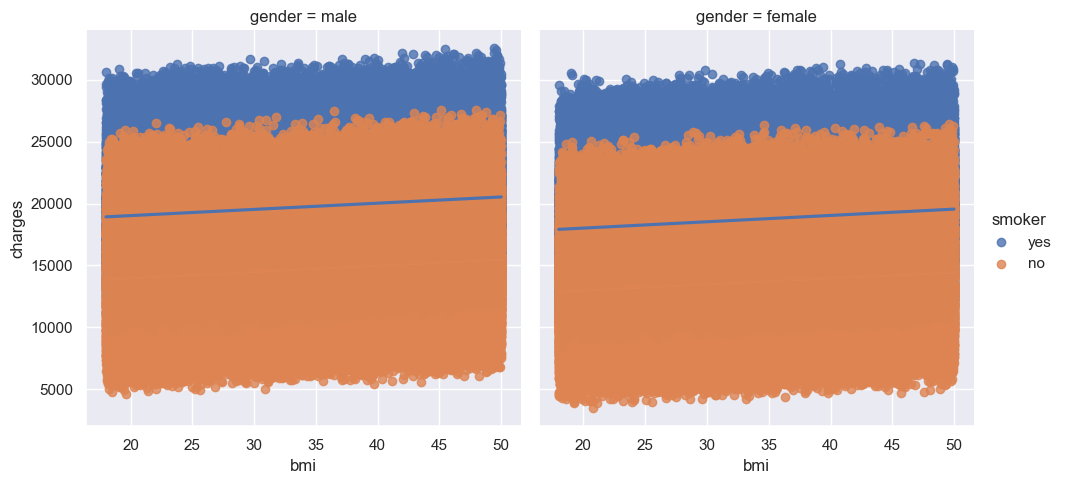

In [44]:
sns.lmplot(data=data, x='bmi', y='charges',hue='smoker', col='gender')

<Axes: >

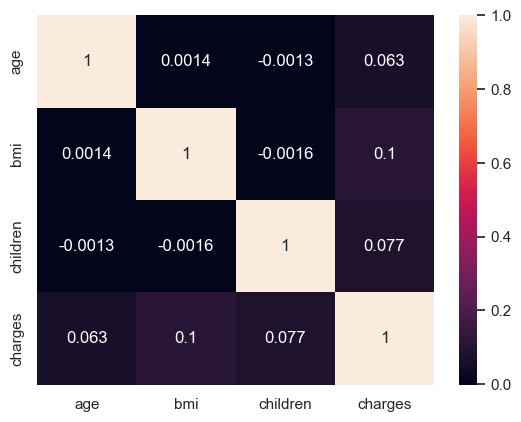

In [45]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

### Feature Engineering

In [46]:
df = data.copy()

In [47]:
[print(col, ': ', df[col].unique()) for col in df.columns if df[col].dtype == 'object']

gender :  ['male' 'female']
smoker :  ['yes' 'no']
region :  ['southeast' 'northwest' 'southwest' 'northeast']
medical_history :  ['Diabetes' 'No Record' 'High blood pressure' 'Heart disease']
family_medical_history :  ['No Record' 'High blood pressure' 'Diabetes' 'Heart disease']
exercise_frequency :  ['Never' 'Occasionally' 'Rarely' 'Frequently']
occupation :  ['Blue collar' 'White collar' 'Student' 'Unemployed']
coverage_level :  ['Premium' 'Standard' 'Basic']


[None, None, None, None, None, None, None, None]

#### Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['medical_history'] = le.fit_transform(df['medical_history'])
df['family_medical_history'] = le.fit_transform(df['family_medical_history'])
df['exercise_frequency'] = le.fit_transform(df['exercise_frequency'])
df['occupation'] = le.fit_transform(df['occupation'])
df['coverage_level'] = le.fit_transform(df['coverage_level'])

<Axes: >

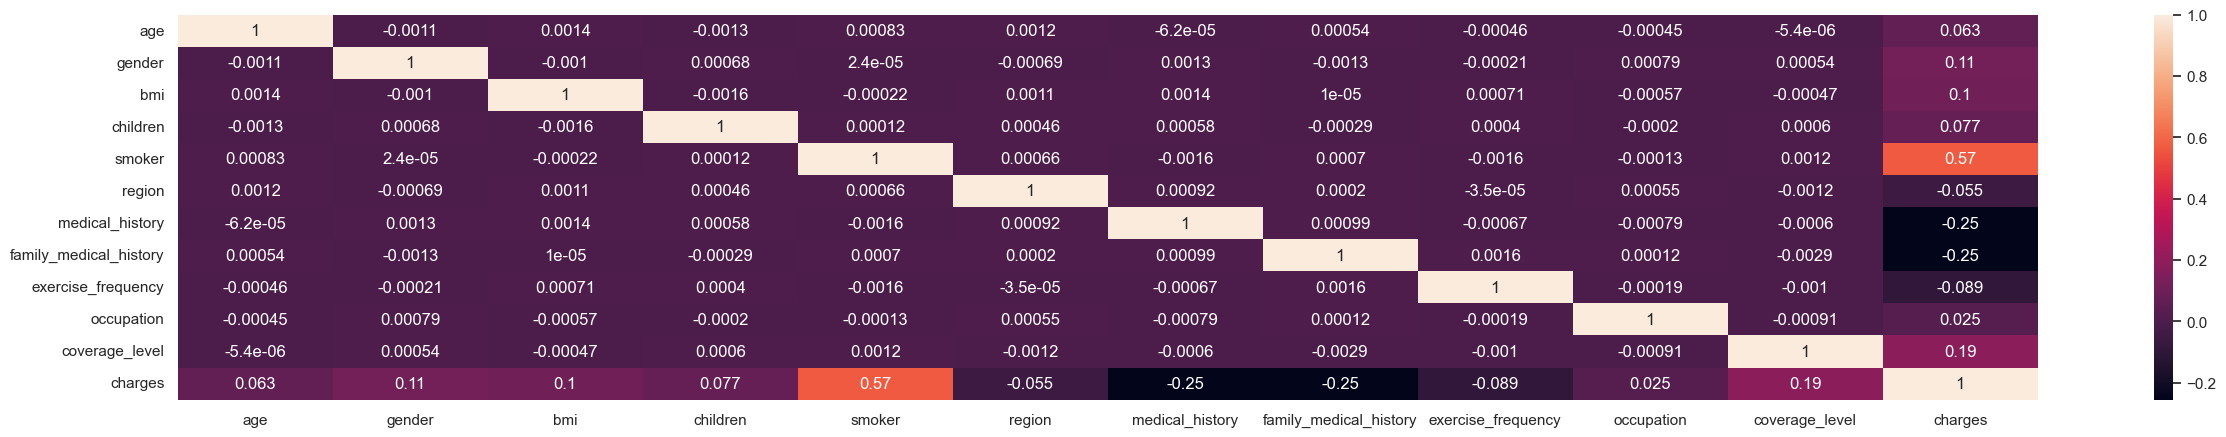

In [49]:
plt.figure(figsize=(30,5))
sns.heatmap(df.corr(numeric_only=True), annot=True)

- Insight:
------------------
- [Smoker > Medical History(-ve) > Family Medical History(-ve) > Coverage Level > BMI  > Gender ] has high correlation with charges

-  [Region, children, exercise frequency, occupation, Age] has no significant correlation with charges. Hence can be neglected !

#### Splitting Dataset

In [50]:
X = df.drop(['charges', 'region', 'children','exercise_frequency','occupation'], axis=1).values
y = df['charges'].values

#### Standardizing Dataset

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

y = sc.fit_transform(y.reshape(-1, 1))

#### Model Building

In [52]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.512
Method:                 Least Squares   F-statistic:                          1.497e+05
Date:                Thu, 18 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:26:21   Log-Likelihood:                     -1.0605e+06
No. Observations:             1000000   AIC:                                  2.121e+06
Df Residuals:                  999993   BIC:                                  2.121e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- multiple linear regression

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, lr.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.51
R2-score [Testing]: 0.05
Mean Absolute Error: 0.57
Mean Squared Error: 0.49
Root Mean Squared Error: 0.70


- Lasso Regressor (Handling Outlier + Feature Selection)

In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, lasso.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.00
R2-score [Testing]: 0.00
Mean Absolute Error: 0.81
Mean Squared Error: 1.00
Root Mean Squared Error: 1.00


- Stochastic Gradient Descent (SDG) Regressor

In [56]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

sgd.fit(X_train, y_train.ravel())

y_pred = sgd.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, sgd.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.51
R2-score [Testing]: 0.04
Mean Absolute Error: 0.57
Mean Squared Error: 0.49
Root Mean Squared Error: 0.70


- Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

dt.fit(X_train, y_train.ravel())

y_pred = dt.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, dt.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.58
R2-score [Testing]: 0.27
Mean Absolute Error: 0.53
Mean Squared Error: 0.42
Root Mean Squared Error: 0.65


- Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3, min_samples_leaf=5)

rf.fit(X_train, y_train.ravel())

y_pred = rf.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, rf.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.63
R2-score [Testing]: 0.30
Mean Absolute Error: 0.49
Mean Squared Error: 0.37
Root Mean Squared Error: 0.61


- XGBoost

In [59]:
#XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train.ravel())

y_pred = xgb.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, xgb.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.93
R2-score [Testing]: 0.92
Mean Absolute Error: 0.22
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


XGBRegressor Gives the best results in terms of Errors and R2-score (Higher than 90% Accuracy)

----

------

#### Try to optimize Model By Taking Most correlated features to 'Charges' feature

In [60]:
df_opt = data.copy()

In [61]:
df_opt

age  gender    bmi  children smoker     region      medical_history  \
0        46    male  21.45         5    yes  southeast             Diabetes   
1        25  female  25.38         2    yes  northwest             Diabetes   
2        38    male  44.88         2    yes  southwest            No Record   
3        25    male  19.89         0     no  northwest            No Record   
4        49    male  38.21         3    yes  northwest             Diabetes   
...     ...     ...    ...       ...    ...        ...                  ...   
999995   59    male  46.67         2     no  northeast  High blood pressure   
999996   33    male  36.83         2     no  northeast            No Record   
999997   39    male  39.84         0    yes  northeast        Heart disease   
999998   37  female  45.06         4    yes  northeast  High blood pressure   
999999   41    male  30.02         2    yes  northeast             Diabetes   

       family_medical_history exercise_frequency    occupation coverage_level  \
0                   No Record              Never   Blue collar        Premium   
1         High blood pressure       Occasionally  White collar        Premium   
2         High blood pressure       Occasionally   Blue collar        Premium   
3                    Diabetes             Rarely  White collar       Standard   
4         High blood pressure             Rarely  White collar       Standard   
...                       ...                ...           ...            ...   
999995              No Record         Frequently       Student          Basic   
999996    High blood pressure         Frequently    Unemployed          Basic   
999997    High blood pressure             Rarely   Blue collar       Standard   
999998               Diabetes       Occasionally    Unemployed        Premium   
999999          Heart disease       Occasionally   Blue collar       Standard   

             charges  
0       20460.307669  
1       20390.899218  
2       20204.476302  
3       11789.029843  
4       19268.309838  
...              ...  
999995  11584.134900  
999996   9834.871456  
999997  22076.632856  
999998  20297.618728  
999999  23429.725030  

[1000000 rows x 12 columns]

#### Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_opt['gender'] = le.fit_transform(df_opt['gender'])
df_opt['smoker'] = le.fit_transform(df_opt['smoker'])
df_opt['region'] = le.fit_transform(df_opt['region'])
df_opt['medical_history'] = le.fit_transform(df_opt['medical_history'])
df_opt['family_medical_history'] = le.fit_transform(df_opt['family_medical_history'])
df_opt['exercise_frequency'] = le.fit_transform(df_opt['exercise_frequency'])
df_opt['occupation'] = le.fit_transform(df_opt['occupation'])
df_opt['coverage_level'] = le.fit_transform(df_opt['coverage_level'])

<Axes: >

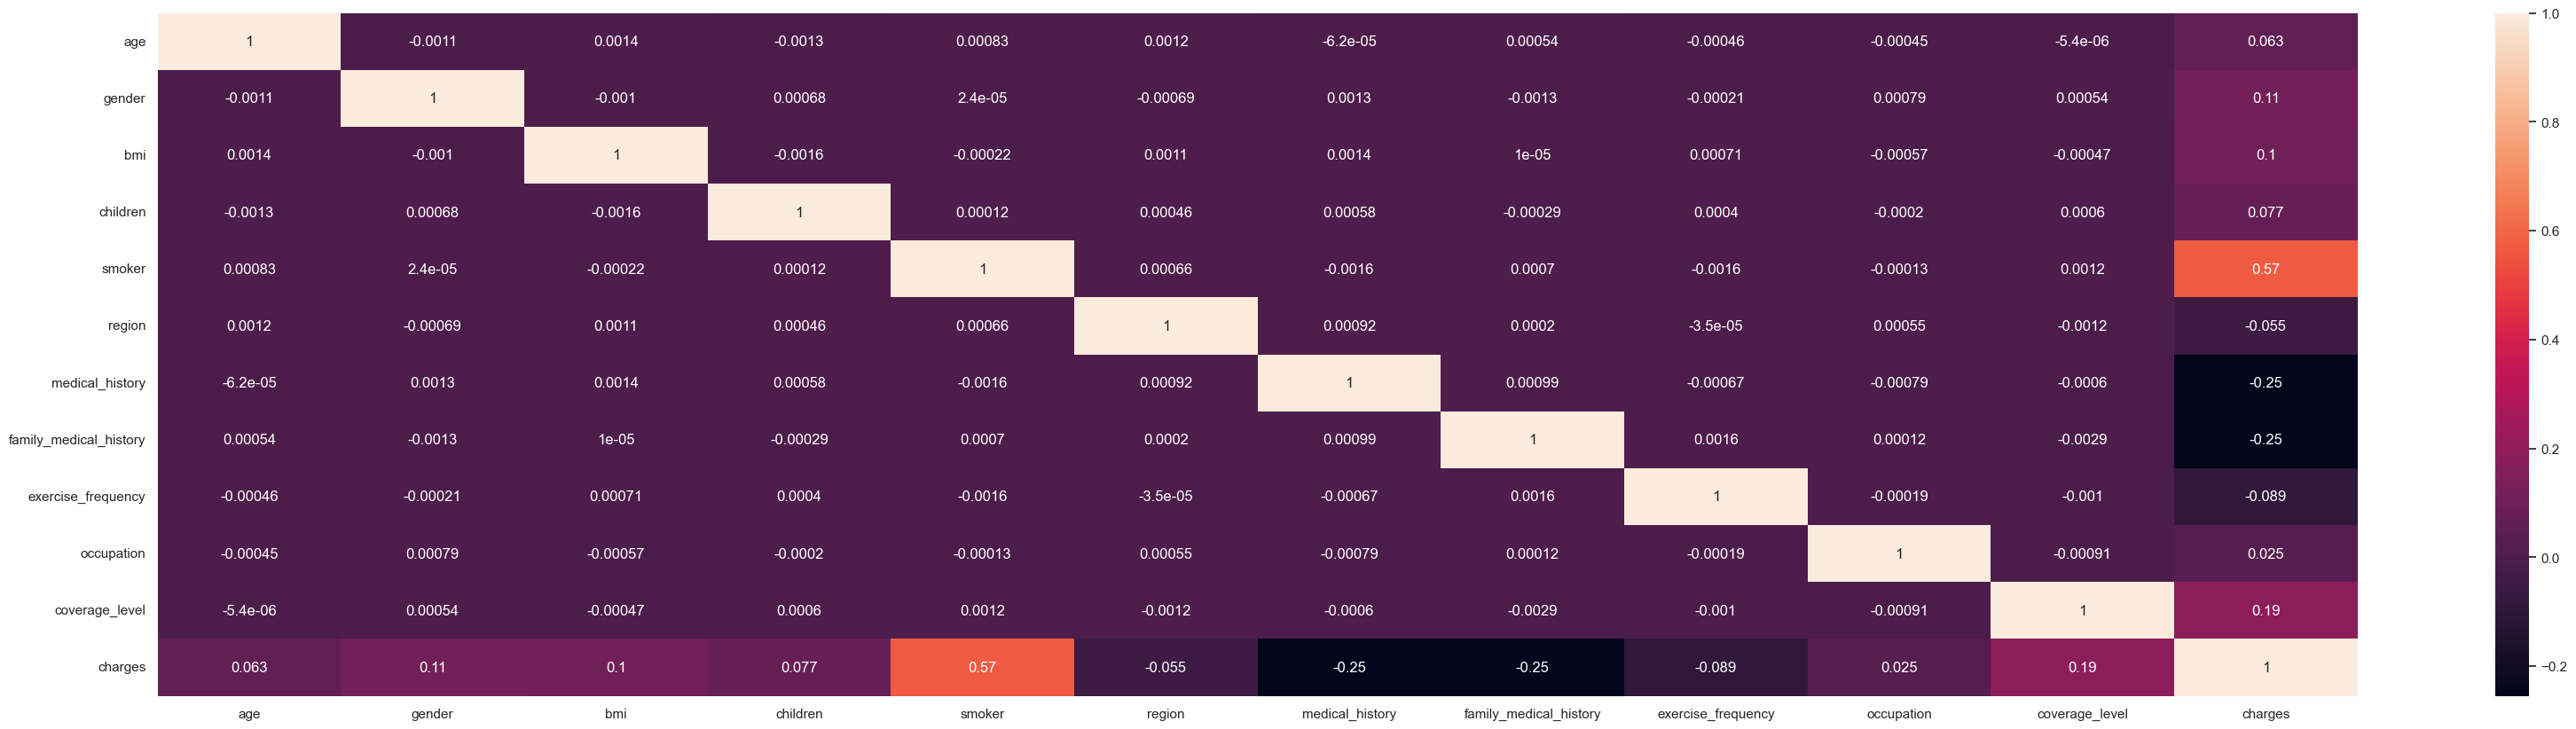

In [63]:
plt.figure(figsize=(40, 10))
sns.heatmap(df_opt.corr(numeric_only=True), annot=True)

#### Splitting Dataset

In [64]:
X = df_opt.drop(['charges', 'region', 'children','exercise_frequency','occupation','age'], axis=1).values
y = df_opt['charges'].values

#### Standardizing Dataset

In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

y = sc.fit_transform(y.reshape(-1, 1))

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- multiple linear regression

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, lr.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.51
R2-score [Testing]: 0.03
Mean Absolute Error: 0.57
Mean Squared Error: 0.49
Root Mean Squared Error: 0.70


- Lasso Regressor (Handling Outlier + Feature Selection)

In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, lasso.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.00
R2-score [Testing]: 0.00
Mean Absolute Error: 0.81
Mean Squared Error: 1.00
Root Mean Squared Error: 1.00


- Stochastic Gradient Descent (SDG) Regressor

In [69]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

sgd.fit(X_train, y_train.ravel())

y_pred = sgd.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, sgd.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.51
R2-score [Testing]: 0.02
Mean Absolute Error: 0.57
Mean Squared Error: 0.49
Root Mean Squared Error: 0.70


- Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

dt.fit(X_train, y_train.ravel())

y_pred = dt.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, dt.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.58
R2-score [Testing]: 0.27
Mean Absolute Error: 0.53
Mean Squared Error: 0.42
Root Mean Squared Error: 0.65


- Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3, min_samples_leaf=5)

rf.fit(X_train, y_train.ravel())

y_pred = rf.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, rf.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.63
R2-score [Testing]: 0.29
Mean Absolute Error: 0.49
Mean Squared Error: 0.37
Root Mean Squared Error: 0.61


- XGBoost

In [72]:
#XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train.ravel())

y_pred = xgb.predict(X_test)

print('R2-score [Training]: {:.2f}'.format(r2_score(y_train, xgb.predict(X_train))))
print('R2-score [Testing]: {:.2f}'.format(r2_score(y_pred, y_test)))

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2-score [Training]: 0.92
R2-score [Testing]: 0.91
Mean Absolute Error: 0.23
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


###  Conclusion

- XGBoost is the best performing model (after reducing the number of features)

------

----